# Снижение размерности пространства

Визуализация данных помогает понять их структуру и, как следствие, подсказывает методы анализа этих данных. Однако отображение многомерных данных на плоскости упирается в слишком большое количество измерений. Следовательно, встает задача отображения большого числа измерений на плоскость.

Ниже генерируются данные состоящие из трех четырехмерных сфер, точки в которых распределены нормально. Если мы построим их четырехмерный эпюр, то границу между этими сферами не будет видно.

In [1]:
from sklearn.datasets import make_blobs

# Интерактивный режим отображения рисунков - масштабирование, перемещение, вращение, ...
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
blob_X, y = make_blobs(n_samples=[30, 30, 30], centers=[[-7, -7, -7, -7], [0, 0, 0, 0], [7, 7, 7, 7]], 
                  cluster_std=2.3, random_state=77)

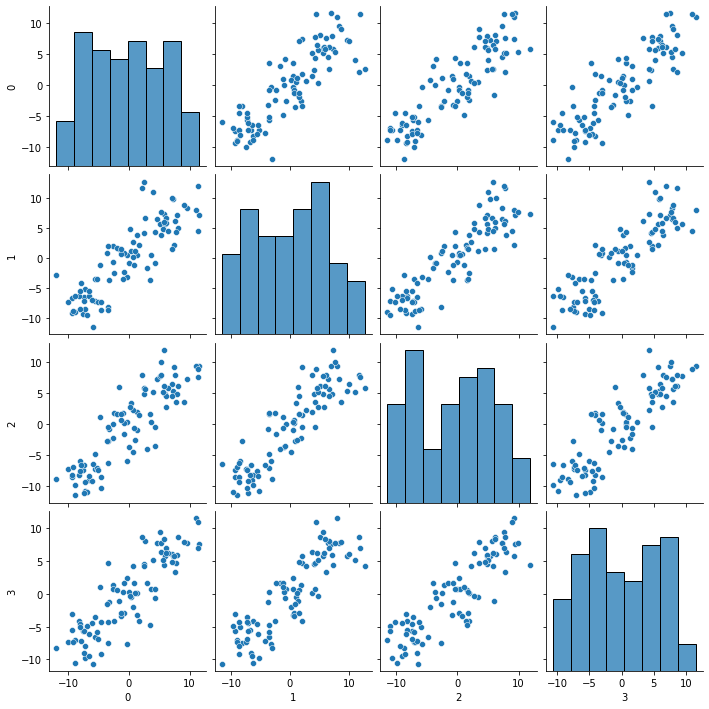

In [3]:
# Построение четырехмерного эпюра для сгенерированных данных.
sns.pairplot(pd.DataFrame(blob_X));

Однако, если подобрать правильную проекцию для отображаемых данных, то сразу станет видно, что сгенерированные сферы не пересекаются (или почти не пересекаются).

Подберем такую проекцию при помощи метода PCA.

In [4]:
from sklearn.decomposition import PCA

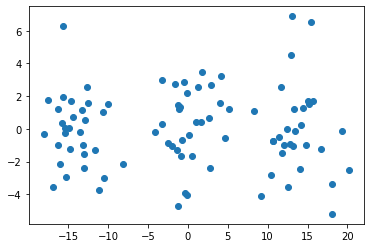

In [5]:
show_reduced = PCA(n_components=2).fit_transform(blob_X)
plt.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced]);

Один из методов такого отображения  Например,

Теперь подробнее рассмотрим <a href="https://habr.com/post/304214/">метод главных компонент</a> (<i>PCA, Principle Component Analysis, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> документация</a></i>, можно немного потрогать руками <a href="https://setosa.io/ev/principal-component-analysis/">здесь</a>, с большим количеством математики метод описывается на <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82">machinelearning.ru</a>). Его суть состоит в том, что мы преобразуем пространство в новое, имеющее меньшую размерность, и строим проекцию на него. Для этого находится новая ось, вдоль которой относительная дисперсия наших данных максимальна. Далее строится проекция всех точек на эту ось, а полученные значения становятся первой координатой в новом пространстве. Это направление отбрасывается, после чего можно снова попытаться найти еще одну ось, еще одну и т.д. Операцию можно повторить столько раз, сколько измерений должно быть в новом пространстве.

![](img/correlated_2d.png)

In [6]:
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
from ipywidgets import Button, interact, interactive_output, HBox, VBox, Layout, \
                       Output, FloatSlider, IntSlider, Checkbox, Select
from IPython.display import display

In [7]:
data = []
posx = 0.0
posy = 0.0
posz = 0.0

def draw_PCA_data():
    global fig1, ax1, fig2, ax2, data
    ax1.clear()
    ax2.clear()
    if len(data)>0:
        dat = np.array(data)
        ax1.scatter(dat[:, 0], dat[:, 1], dat[:, 2], cmap=plt.cm.Set1, edgecolor='g', s=40)
    with out1:
        out1.clear_output(wait=True)
        display(fig1)
    if len(data)>0:
        if methodSelect.value == 'PCA':
            reduced = PCA(n_components=2).fit_transform(data)
        elif methodSelect.value == 'MDS':
            reduced = MDS(n_components=2).fit_transform(data)
        ax2.scatter(reduced[:, 0], reduced[:, 1], c='b', s=50)
    with out2:
        out2.clear_output(wait=True)
        display(fig2)


def init_PCA_drawing(arg):
    global data, posx, posy, posz
    data = []
    posx = 0.0
    posy = 0.0
    posz = 0.0
    draw_PCA_data()
    
def add_data_PCA_drawing(arg):
    global data, sld1, sld2, sld3, sldsx, sldsy, sldsz, posx, posy, posz
    for i in range(5):
        data.append([posx+np.random.standard_normal(1)[0]*sld1.value/20,
                     posy+np.random.standard_normal(1)[0]*sld2.value/20,
                     posz+np.random.standard_normal(1)[0]*sld3.value/20
                    ])
    posx += sldsx.value
    posy += sldsy.value
    posz += sldsz.value
    draw_PCA_data()



/tmp/ipykernel_302689/2601842376.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1=Axes3D(fig1, elev=60, azim=150)


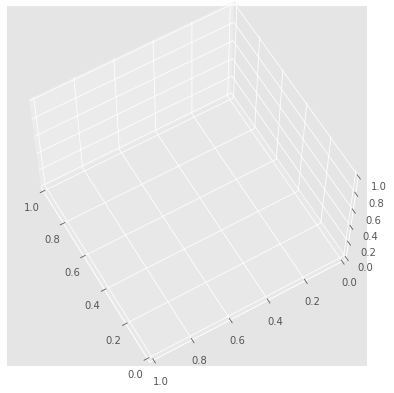

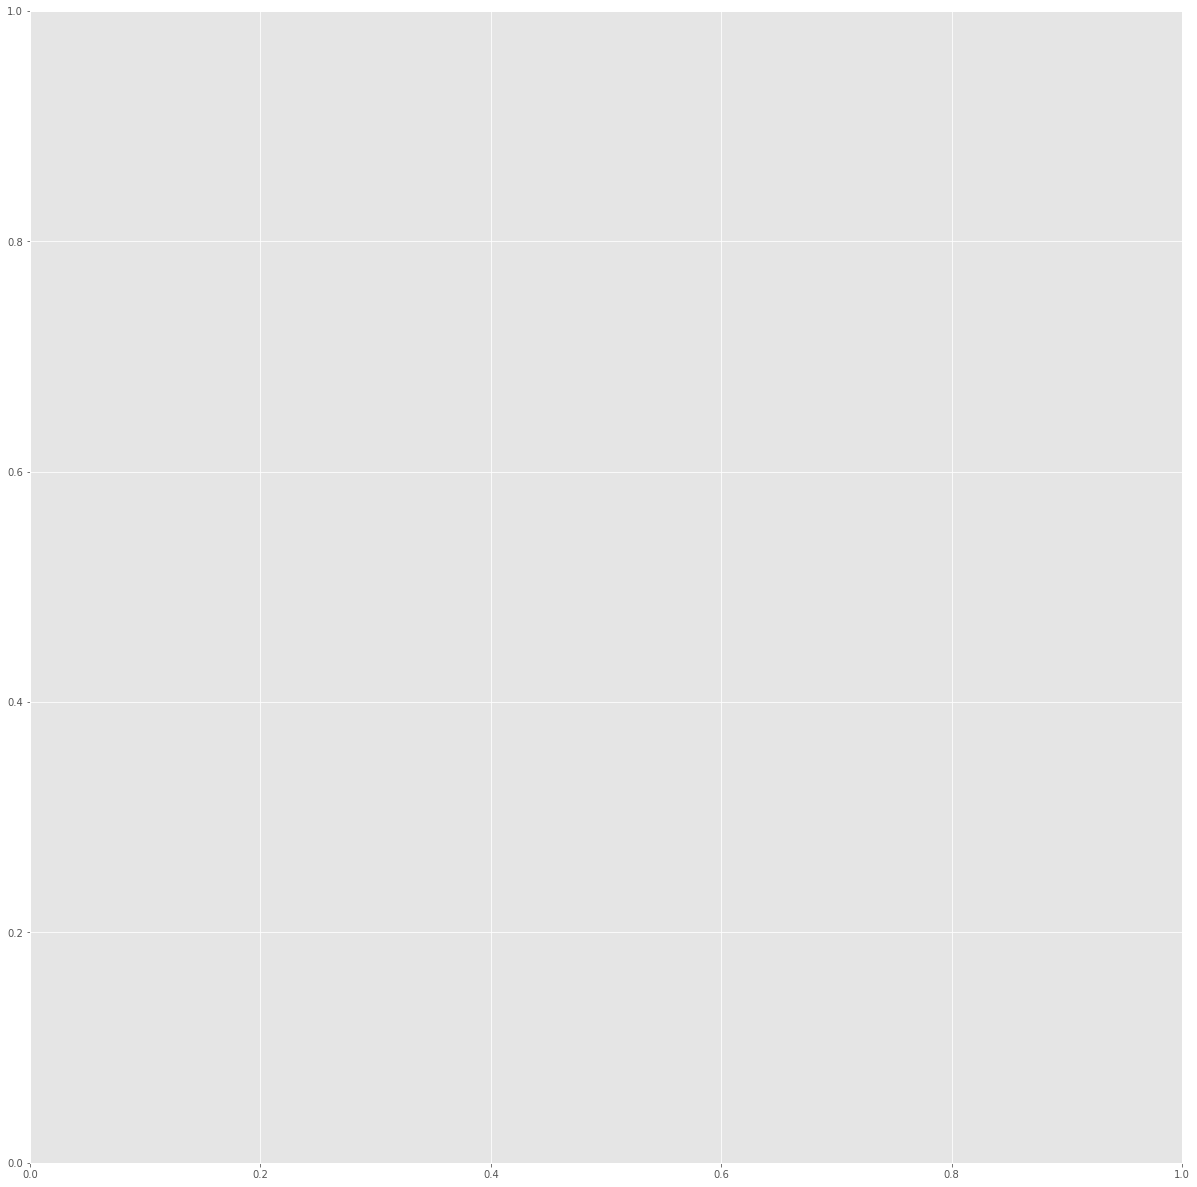

In [8]:
out1=Output(layout=Layout(height='400px', width = '400px', border='solid'))
fig1 = plt.figure(1, figsize=(5, 5))
ax1=Axes3D(fig1, elev=60, azim=150)
out2=Output(layout=Layout(height='400px', width = '400px', border='solid'))
fig2 = plt.figure(2, figsize=(4, 4))
# ax2 = plt.scatter([], [], s=40, fig=fig)
# ax2 = plt.Axes(fig2, [0, 0, 4, 4])
fig2.add_axes([0, 0, 4, 4])
ax2 = fig2.axes[0]

sld1 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation X')
sld2 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation Y')
sld3 = FloatSlider(value=0.1, min=0, max=1.0, step=0.01, description='Deviation Z')
sldsx = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by X')
sldsy = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by Y')
sldsz = FloatSlider(value=0.01, min=-0.1, max=0.1, step=0.01, description='Step by Z')
buttonIni = Button(description='Init')
buttonStep2 = Button(description='Step')
methodSelect = Select(options=['PCA', 'MDS'], value='PCA', description='Method')

bbox1 = HBox(children=(buttonIni, buttonStep2, methodSelect))
bbox2 = HBox(children=(sld1, sld2, sld3 ))
bbox3 = HBox(children=(sldsx, sldsy, sldsz ))
vbox = VBox(children=(bbox1, bbox2, bbox3))
hbox2 = HBox(children=(out1,out2))
hbox = VBox(children=(hbox2, vbox))
display(hbox)
out1.clear_output(wait=True)
out2.clear_output(wait=True)

buttonIni.on_click(init_PCA_drawing)
buttonStep2.on_click(add_data_PCA_drawing)

# generate(None)
# for i in range(100):
#     moveAndDrawPoints(1)


По умолчанию PCA строит преставление пространства той же размерности, что и входные данные, однако сортирует измерения по "важности".<br>
При помощи функции fit_transform мы настраиваем коэффициенты преобразования (fit) и преобразуем переданные точки (transform). Каждое из этих действий для PCA можно производить по отдельности.<br>

Посмотрим как метод себя ведет на некоторых простых данных. Есть линия со случайными смещениями, к которой прибавлена относительно плоская область, идущая вдоль той же линии ("палочка" + "половинка монетки"). Посмотрим на ее преобразования при помощи метода главных компонент.

In [9]:
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [10]:
np.random.seed(17)
pca_len=100

In [11]:
pca_coord=np.zeros((pca_len, 3))
pca_coord2=np.zeros((int(pca_len/2), 3))

pca_coord[:,0]=np.arange(pca_len)
pca_coord[:,1]=3*pca_coord[:,0]+np.random.normal(scale=3., size=(pca_len))
pca_coord[:,2]=5*pca_coord[:,0]+np.random.normal(scale=5., size=(pca_len))

pca_coord2[:,0]=np.arange(pca_len/4, 3*pca_len/4)
pca_coord2[:,1]=[3*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 5, 1) for x in pca_coord2[:,0]]
pca_coord2[:,2]=[5*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 1, 1) for x in pca_coord2[:,0]]

pca_coord=np.vstack((pca_coord, pca_coord2))

/tmp/ipykernel_302689/4281403409.py:9: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  pca_coord2[:,1]=[3*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 5, 1) for x in pca_coord2[:,0]]
/tmp/ipykernel_302689/4281403409.py:10: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  pca_coord2[:,2]=[5*x+(int(pca_len/2)-np.abs(x-int(pca_len/2)))*np.random.uniform(0, 1, 1) for x in pca_coord2[:,0]]


Для начала нарисуем данные при помощи seaborn.

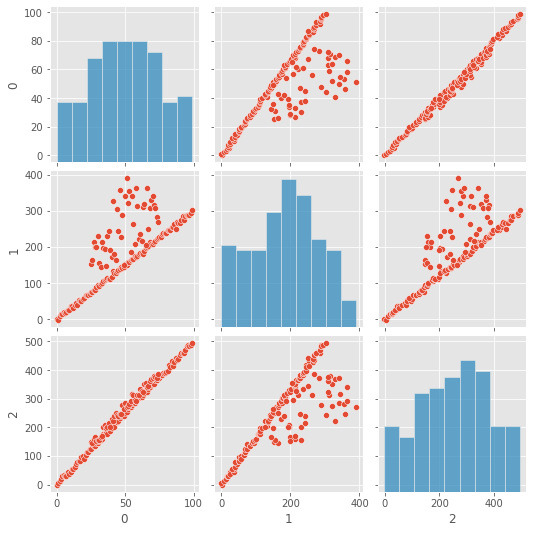

In [12]:
sns.pairplot(pd.DataFrame(pca_coord));

In [13]:
pca=PCA(n_components=2) # Просим PCA вернуть 2 коодинаты. По умолчанию вернет столько же, сколько подадим на вход.
show_reduced = pca.fit_transform(pca_coord)
pca_coord.shape, show_reduced.shape

((150, 3), (150, 2))

Плюсом метода PCA является тот факт, что после нахождения осей в новое пространство можно преобразовать любую точку исходного пространства. Это возможно, так как преобразование сводится к повороту, масштабированию и проекции.

In [14]:
# Координаты осей в исходном пространстве.
pca.components_

array([[-0.15786887, -0.57311394, -0.8041255 ],
       [-0.13885943,  0.81913003, -0.55654654]])

In [15]:
def plot_PCA(pca_coord):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку.
    ax.scatter(pca_coord[:, 0], pca_coord[:, 1], pca_coord[:, 2], 
               cmap=plt.cm.Set1, edgecolor='g', s=40)
    ax.set_title("Simple Data")

    plt.show()

    pca=PCA(n_components=2) # Просим PCA вернуть 2 коодинаты. По умолчанию вернет столько же, сколько подадим на вход.
    show_reduced = pca.fit_transform(pca_coord)

    fig, ax = plt.subplots() # Рисуем двумерную картинку.
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b', s=40)
    plt.show()
    

/tmp/ipykernel_302689/3459833223.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку.


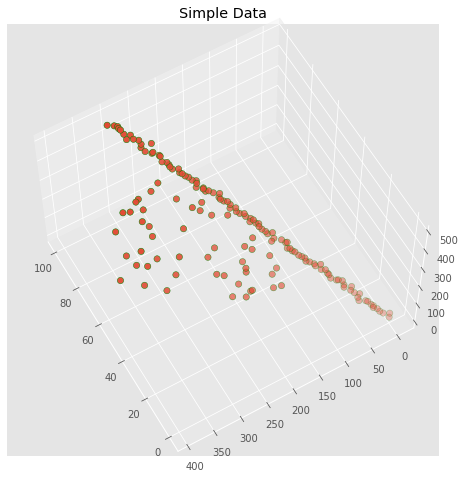

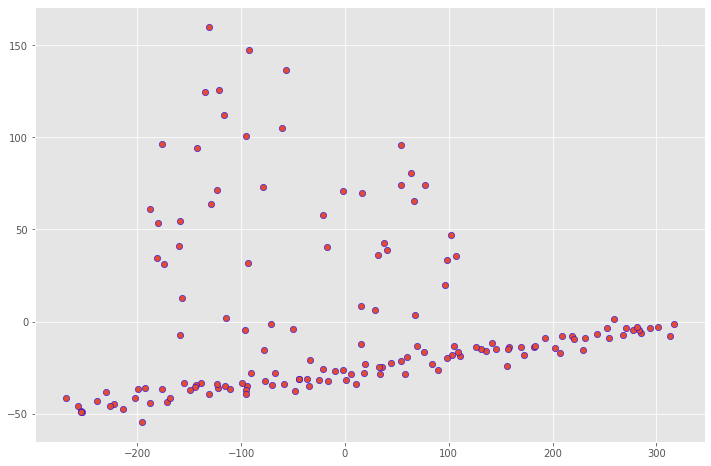

In [16]:
plot_PCA(pca_coord)

Мы видим, что PCA в самом деле повернул систему координат так, чтобы наши данные оказались максимально "в профиль".

Теперь переместим "половинку монетки" из середины "палочки" к одному из ее концов.

/tmp/ipykernel_302689/3459833223.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку.


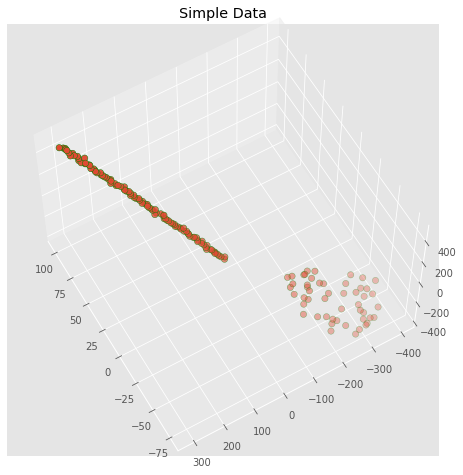

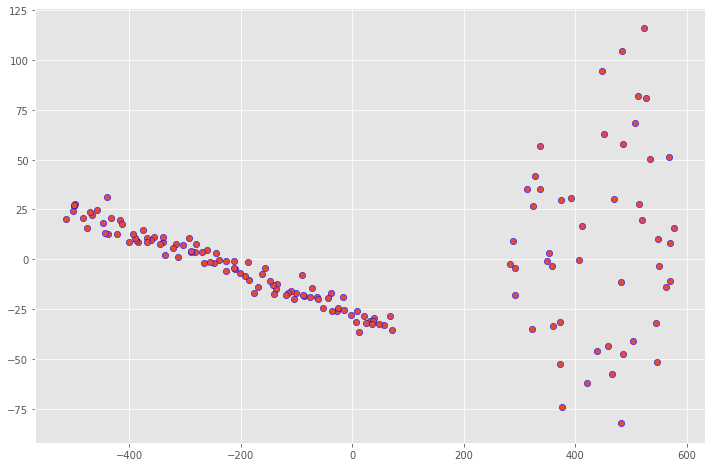

In [17]:
pca_coord3=np.vstack((pca_coord[:pca_len], -pca_coord2))
plot_PCA(pca_coord3)

Метод MDS (<i>Multidimensional Scaling</i>) поступает примерно по тому же принципу, но работает несколько быстрее и лучше. Идея метода состоит в том, что он пытается перейти в пространство меньшей размерности так, чтобы расстояния между объектами в новом пространстве были подобны расстояниям в исходном пространстве.

Однако в отличие от PCA он не умеет сохранять коэффициенты преобразования и использовать их для преобразования новых данных.

In [18]:
from sklearn.manifold import MDS

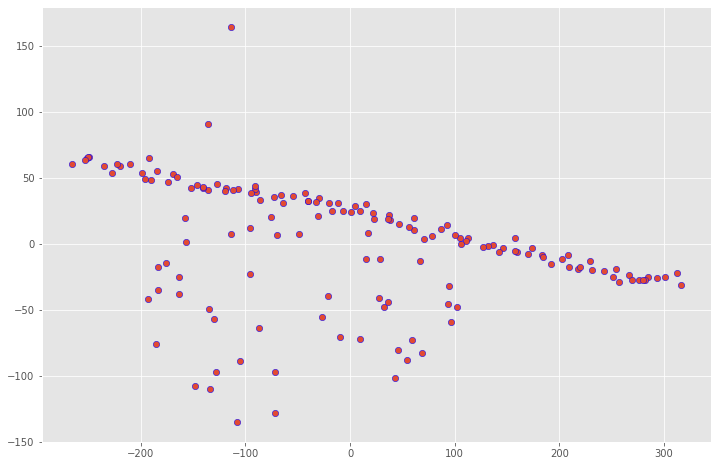

In [19]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

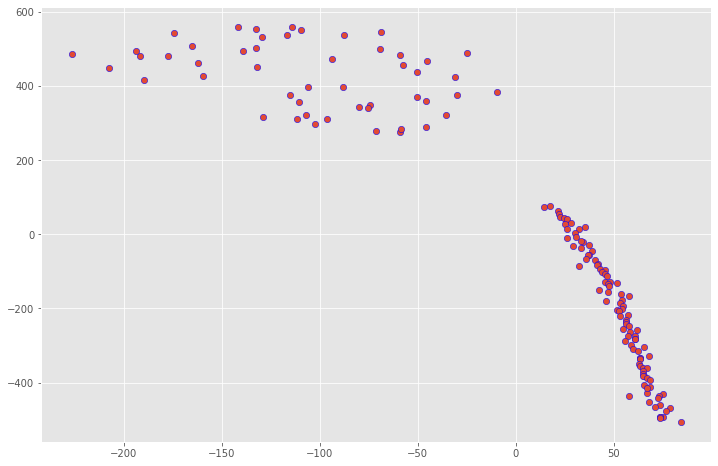

In [20]:
mds=MDS(random_state=1023)
show_reduced = mds.fit_transform(pca_coord3)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Еще одним методом является t-SNE (<i>t-distributed stochastic neighbor embedding</i>). В отличие от предыдущих двух методов, он не строит проекции, а пытается "вдавить" точки в пространство заданной размерности, соблюдая при этом примерное расположение точек. Очевидно, полностью сохранить расположение получается не всегда, но алгоритм старается сделать так, чтобы соседние точки остались соседними.<br>
Как и MDS, t-SNE принципиально не умеет сохранять правила преобразования пространства, так что преобразовывать надо все точки сразу.<br>
Простое и понятное объяснение, а также визуализацию результатов можно найти [здесь](https://distill.pub/2016/misread-tsne/).
<br>

In [21]:
from sklearn.manifold import TSNE

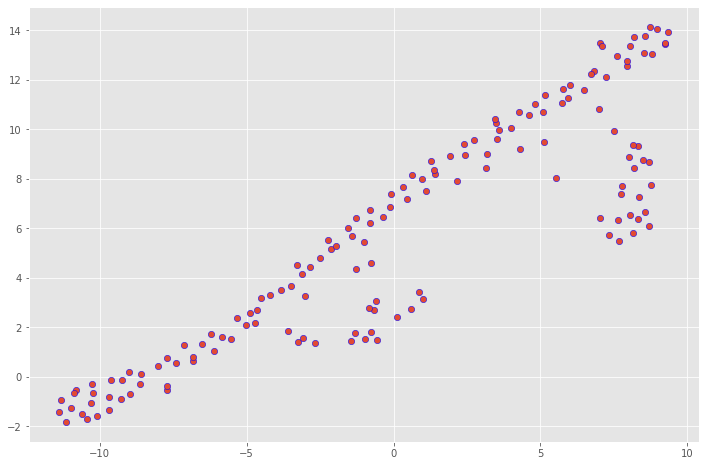

In [22]:
tsne=TSNE()
show_reduced = tsne.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Подобное преобразование можно сравнить с построением проекции глобуса - карты. При построении такой проекции мы тоже пытаеммся снизить размерность трехмерной фигуры до двух измерений. При этом могут использоваться искажения, то есть мы будем сжимать и растягивать карту. При этом могут возникать разрывы в разных местах. В любом случае, точки, которые были рядом (например, по границе карты) оказываются разнесены друг от друга.

На самом деле, t-SNE случайным образом разбрасывает точки по пространству нужной размерности, а потом проводит оптимизацию функционала взаимодействия между точками. ([Видео с объяснениями](https://www.youtube.com/watch?v=NEaUSP4YerM))

Примерно такая же картина в смысле разрывов и искажений наблюдается при применении методов наподобие t-SNE. Для разных начальных расположений точек будет получаться разная картина для искажений.

<img src="img/scale_1200.webp" width="400">
<img src="img/675px-Goode_homolosine_projection_SW.jpg" width="400">
<img src="img/0c41ef6a88a84deaaccf18ae2a5862cd.jpg" width="400">
<img src="img/675px-Bonne_projection_SW.jpg" width="400">

Больше примеров проекций см. <a href = "https://xkcd.com/977/">здесь</a>.



In [23]:
# Глобальные переменные: номер шага, матрица расстояний в исходном пространстве, 
# позиции точек в двумерном пространстве, количество точек.
step_no = 1
dist_matrix = None
positions = None
point_count = 50

# Генерация матрица расстояний для точек. 
# По умолчанию точки расположены на расстоянии 1 друг от друга.
def generate(arg):
    global dist_matrix, positions, point_count, step_no
    
    step_no = 1
    dist_matrix = np.ones((point_count, point_count))
    for i in range(point_count):
        dist_matrix[i,i] = 0 
        
    # Для части точек делаем случайное отклонение [-0.5; +0.5] от 1
    dif_pos = np.random.rand(3 * point_count, 2) * point_count
    dif_pos = dif_pos.astype(np.int32)
    for dp in dif_pos:
        n = np.random.rand(1) - 0.5
        dist_matrix[dp[0], dp[1]] += n
        dist_matrix[dp[1], dp[0]] += n
        
    # Сделаем три компоненты сильной связности, чтобы было видно как они стягиваются друг к другу.
    for k in [[0,5], [10,15], [20,25]]:
        for i in range(k[0], k[1]):
            for j in range(k[0], k[1]):
                if i == j:
                    continue
                n = np.random.rand(1) * 0.2
                dist_matrix[i, j] = n
                dist_matrix[j, i] = n
        
    # Для еще части увеличиваем расстояния.
    dif_pos = np.random.rand(3 * point_count, 2) * point_count
    dif_pos = dif_pos.astype(np.int32)
    for dp in dif_pos:
        n = np.random.standard_normal(1)[0] * 2
        dist_matrix[dp[0], dp[1]] += n
        dist_matrix[dp[1], dp[0]] += n

    # Могли получиться отрицательные расстояния.
    dist_matrix = np.absolute(dist_matrix)
    positions = np.random.rand(point_count, 2)
    # Рисуем начальное расположение точек.
    moveAndDrawPoints(None)

# Расчет силы, действующей на две точки.
def calcForce(pos1, pos2, dist):
    v1 = pos1 - pos2
    rel = np.linalg.norm(v1) / dist
    # Если (расстояние на плоскости) / (расстояние между точками в исходном пространстве) > 1
    # то притягиваются, в противном случае - отталкиваются.
    if rel > 1:
        return v1 * rel
    else:
        return -2 * v1 / rel

# Рассчитываем вектора смещений для точек в зависимости от суммы сил,
# действующих на каждую точку.
def calcVectors(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    for i in range(point_count):
        v = np.zeros(2)
        for j in range(point_count):
            if i == j:
                continue
            v += calcForce(positions[j], positions[i], dist_matrix[i, j])
                
        vectors[i] += v
    # Шаг будем сокращать с течением времени.
    vectors = np.array(vectors) * 0.01 / np.cbrt(step_no+10)
    vectors[vectors>1] = 1
    return vectors

# Здесь имитируем UMAP, добавляя силу, которая пытаетсяя разместить их на круге.
# Не очень хорошо видна какая-либо разница.
def calcVectors2(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    # это расчет силы, отталкивающей точки от их центра масс.
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    center = np.array([cx, cy])
    d = positions - center
    vectors = 100 * d / np.linalg.norm(d) ** 2

    # Это расчет вектора смещений точек.
    for j in range(point_count):
        n1 = positions - positions[j]
        n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
        n3 = np.zeros((point_count, 2))
        for i, nn1 in enumerate(n1):
            if n2[i] > 1:
                n3[i] += nn1 * n2[i]
            elif n2[i] <= 1 and n2[i] != 0:
                n3[i] -= 2 * nn1 / (n2[i]+1e-6)
        vectors[j] += sum(n3)
    vectors *= 0.01 / np.cbrt(step_no+10)
    vectors[vectors>0.5] = 0.5
    return vectors

# Эта функция не возвращает вектор смещений, а просто смещает точки.
# Плюс, здесь сделан аналог далекий SGD - точка перемещается сразу после расчета вектора.
def calcPositions(dist_matrix, positions):
    vectors = np.zeros((point_count, 2))
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    center = np.array([cx, cy])
    d = positions - center
    for i, p in enumerate(d):
        vectors[i] = 0.1 * p / np.linalg.norm(p) ** 2
        if any(vectors[i]>0.1):
            vectors[i] /= (max(vectors[i]) * 10)
#     positions += vectors

    for j in range(point_count):
        for m in range(5):
            n1 = positions - positions[j]
            n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
            n3 = np.zeros((point_count, 2))
            for i, nn1 in enumerate(n1):
                if n2[i] > 1:
                    n3[i] += nn1 * n2[i]
                elif n2[i] <= 1 and n2[i] != 0:
                    n3[i] -= 2 * nn1 / (n2[i]+1e-6)
            v = sum(n3) * 0.01 / np.cbrt(step_no+10) + vectors[j]
            if any(v>0.5):
                v /= max(v) * 2
            positions[j] += v
    return positions

# Рассчитывает нове положения точек и отрисовывает.
def moveAndDrawPoints(arg):
    global dist_matrix, positions, step_no, ax, out
    if arg != None or step_no != 1:
        positions += calcVectors(dist_matrix, positions)
    max_coords = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
    small_pos1, small_pos2 = np.where((dist_matrix<0.2) & (dist_matrix!=0))
    ax.clear()
    ax.scatter(positions[:,0], positions[:,1], s=50)
    ax.scatter(positions[max_coords[0],0], positions[max_coords[0],1], s=50, c='b')
    ax.scatter(positions[max_coords[1],0], positions[max_coords[1],1], s=50, c='b')

    for pos in zip(small_pos1, small_pos2):
        ax.plot([positions[pos[0],0],positions[pos[1],0]], [positions[pos[0],1],positions[pos[1],1]])

    with out:
        out.clear_output(wait=True)
        display(ax.figure)
    step_no += 1
        
# Рассчитывает нове положения точек и отрисовывает (для имитации UMAP).
def moveAndDrawPoints2(arg):
    global dist_matrix, positions, step_no, ax, out
    cx = sum([p[0] for p in positions]) / point_count
    cy = sum([p[1] for p in positions]) / point_count
    if arg != None or step_no != 1:
#         positions += calcVectors2(dist_matrix, positions)
        positions = calcPositions(dist_matrix, positions)
    
    max_coords = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
    small_pos1, small_pos2 = np.where((dist_matrix<0.2) & (dist_matrix!=0))
    ax.clear()
    ax.scatter([cx], [cy], s=50, c='g')
    ax.scatter(positions[:,0], positions[:,1], s=50)
    ax.scatter(positions[max_coords[0],0], positions[max_coords[0],1], s=50, c='b')
    ax.scatter(positions[max_coords[1],0], positions[max_coords[1],1], s=50, c='b')

    for pos in zip(small_pos1, small_pos2):
        ax.plot([positions[pos[0],0],positions[pos[1],0]], [positions[pos[0],1],positions[pos[1],1]])

    with out:
        out.clear_output(wait=True)
        display(ax.figure)
    step_no += 1


/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]


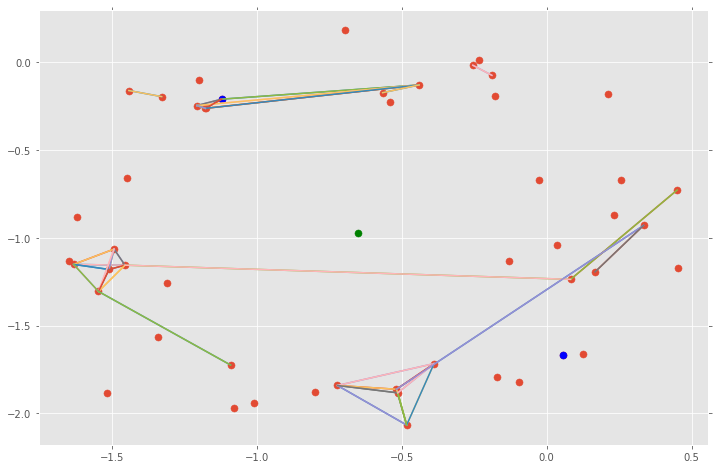

/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linalg.norm(n1, axis=1) / dist_matrix[j]
/tmp/ipykernel_302689/792252516.py:121: RuntimeWarning: invalid value encountered in true_divide
  n2 = np.linal

In [24]:
# Отображение точек.
out=Output(layout=Layout(height='400px', width = '600px', border='solid'))
ax=plt.gca()

buttonGen = Button(description='Generate')
buttonStep = Button(description='Step')
vbox = VBox(children=(buttonGen, buttonStep,))
hbox = HBox(children=(out,vbox))
display(hbox)
with out:
    out.clear_output(wait=True)

buttonGen.on_click(generate)
buttonStep.on_click(moveAndDrawPoints2)

generate(None)
for i in range(100):
    moveAndDrawPoints2(1)


Наконец, алгоритм, который появился в 2018 году - UMAP (<i>Uniform Manifold Approximation and Projection</i>). Принцип работы аналогичен t-SNE. Посмотрим и на его результаты.<br>
<b>Внимание!!!</b><br>
Для установки используйте umap-learn (https://pypi.org/project/umap-learn/)<br>
Его интерфейс отличается от библиотеки umap.

`pip install umap-learn`

In [25]:
import umap

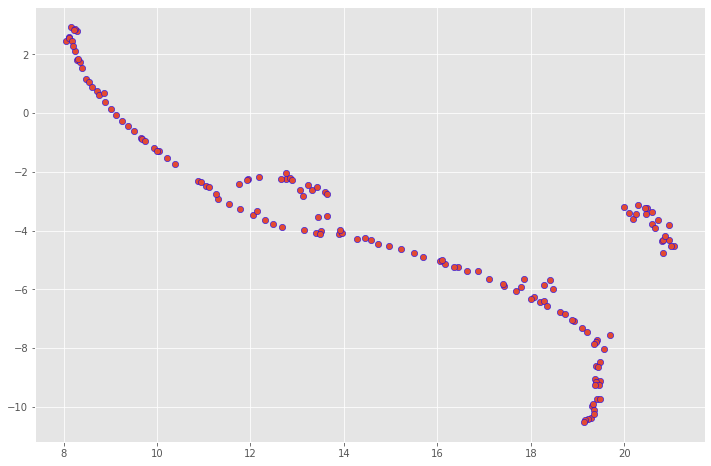

In [26]:
umap_emb = umap.UMAP()
show_reduced = umap_emb.fit_transform(pca_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()


Теперь посмотрим что сделают эти преобразования с сеткой.

In [27]:
grid_coord=np.array(np.meshgrid(np.arange(10), np.arange(10), np.arange(10), np.arange(10))).T.reshape(-1,4)

Ниже специально приведены значения времени, которое потреовалось для расчета. Вы можете оценить, стоит ли запускать, или можно просто посмотреть на результат.

/tmp/ipykernel_302689/3459833223.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150) # Рисуем трехмерную картинку.


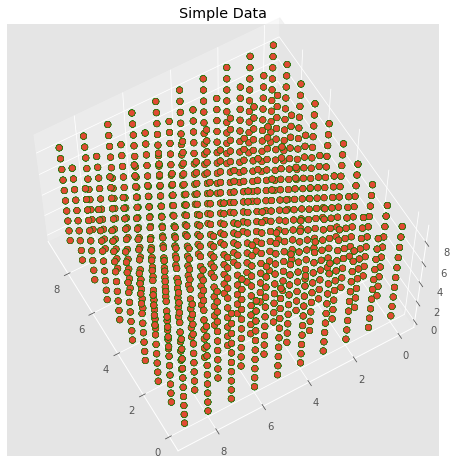

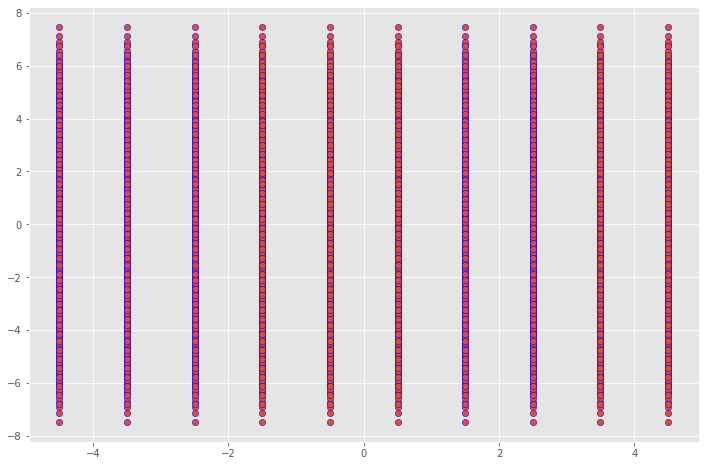

CPU times: user 561 ms, sys: 828 ms, total: 1.39 s
Wall time: 367 ms


In [28]:
%%time

plot_PCA(grid_coord)

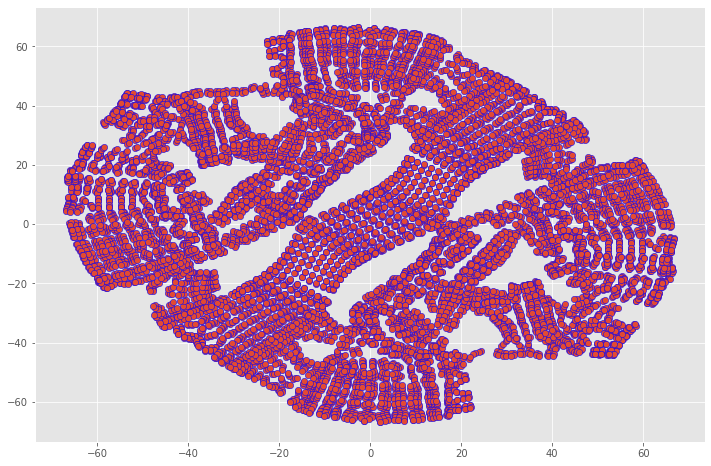

CPU times: user 3min 22s, sys: 158 ms, total: 3min 22s
Wall time: 26.3 s


In [29]:
%%time
show_reduced = tsne.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

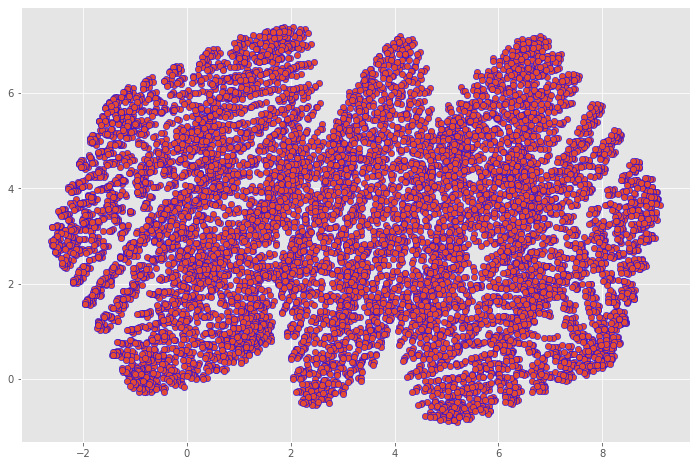

CPU times: user 1min 11s, sys: 1.34 s, total: 1min 12s
Wall time: 19.9 s


In [30]:
%%time
show_reduced = umap_emb.fit_transform(grid_coord)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на три непересекающихся кластера, которые были сгенерированы в начале лекции.

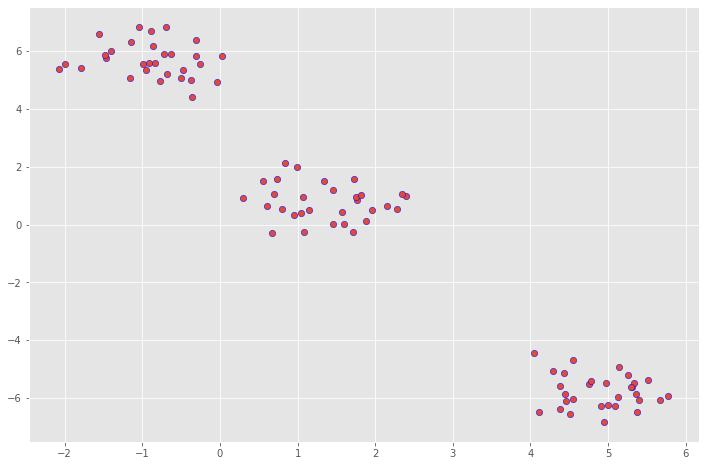

CPU times: user 3.67 s, sys: 240 ms, total: 3.91 s
Wall time: 609 ms


In [31]:
%%time
show_reduced = TSNE().fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

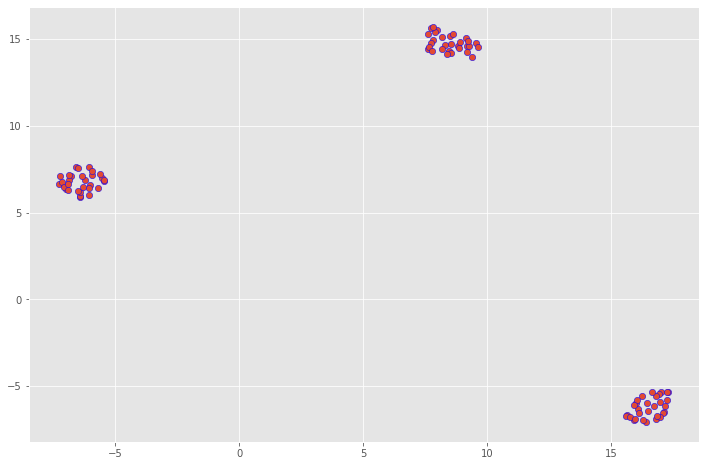

CPU times: user 2.14 s, sys: 0 ns, total: 2.14 s
Wall time: 1.57 s


In [32]:
%%time
show_reduced = umap.UMAP().fit_transform(blob_X)

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], 
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

Теперь посмотрим на классику - ирисы Фишера.

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = sns.load_dataset('iris')

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


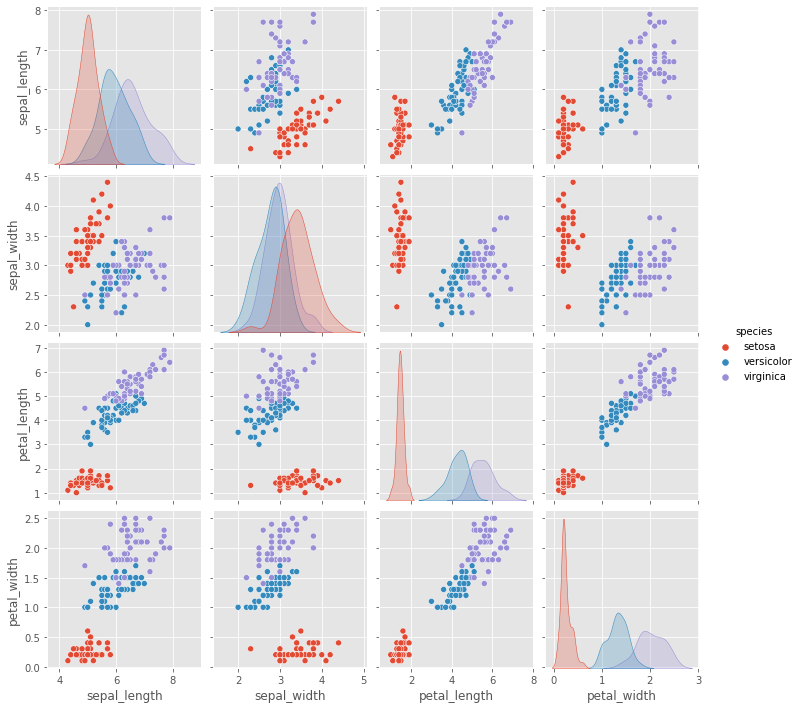

In [36]:
sns.pairplot(iris, hue='species');

In [37]:
X = iris.iloc[:, :4].values

mapping = dict((s, i) for i, s in enumerate(iris.species.unique()))
y = iris.species.replace(mapping).values

X.shape

(150, 4)

In [38]:
pca = PCA(n_components=2)
pca.fit(X)
PC = pca.transform(X)
PC.shape

(150, 2)

In [39]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [40]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

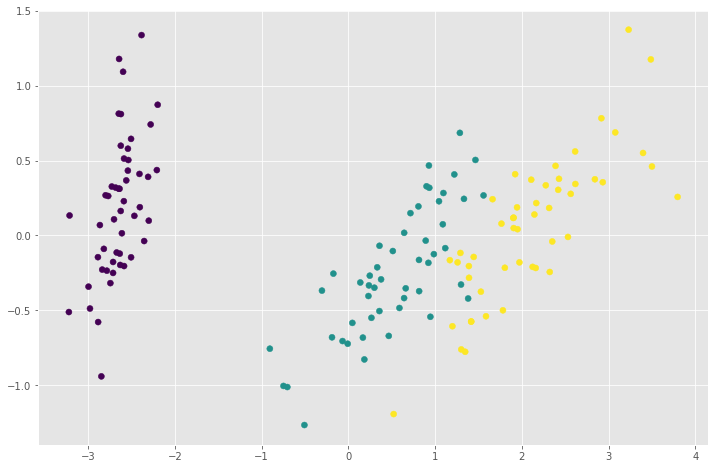

In [41]:
plt.scatter(PC[:,0], PC[:,1],c=y);

Взглянем на t-SNE.

In [42]:
tsne = TSNE(n_components=2)
tsne_iris = tsne.fit_transform(X)
tsne_iris.shape

(150, 2)

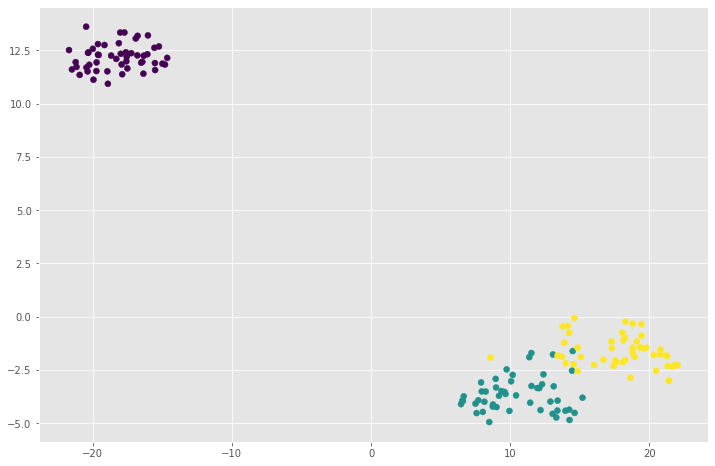

In [43]:
plt.scatter(tsne_iris[:,0], tsne_iris[:,1],c=y);

In [44]:
umap_i = umap.UMAP()
umap_iris = umap_i.fit_transform(X)
umap_iris.shape

(150, 2)

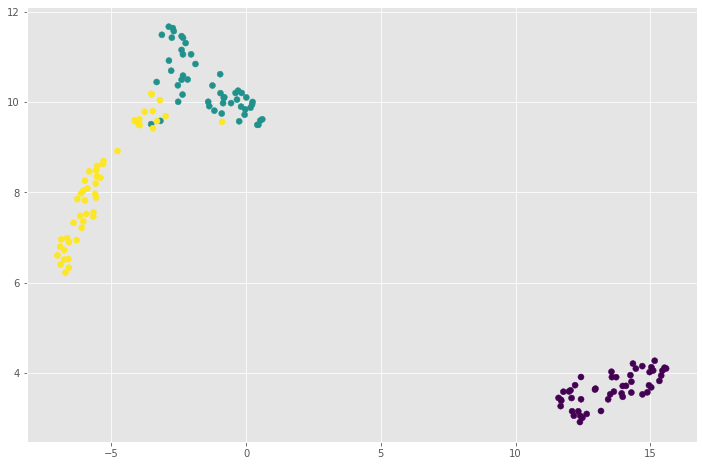

In [45]:
plt.scatter(umap_iris[:,0], umap_iris[:,1],c=y);

In [46]:
%matplotlib inline

from ipywidgets import interact, IntSlider

In [47]:
def umapped_irises(n, c, s):
    fig, ax = plt.subplots()

    umap_i = umap.UMAP(n_neighbors=n, local_connectivity=c, repulsion_strength=s, random_state=1234)
    umap_iris = umap_i.fit_transform(X)
    ax.scatter(umap_iris[:,0], umap_iris[:,1], c = y);
    plt.show()

In [48]:
#fig, ax = plt.subplots()

_=interact(umapped_irises, n=IntSlider(min=1, max=50, value=14, step=1), 
          c=IntSlider(min=1, max=10, value=1, step=1), s=IntSlider(min=1, max=10, value=1, step=1))


interactive(children=(IntSlider(value=14, description='n', max=50, min=1), IntSlider(value=1, description='c',…

Рассмотренные методы обладают следующими достоинствами и недостатками.
- PCA 
    * быстрый (+);
    * повторяющиеся результаты (+);
    * можно добавить новые точки (+);
    * строит проекцию, то есть часть данных теряется (-).
- t-SNE и UMAP 
    * стараются сохранить расстояния между точками (+);
    * это достигается за счет нелинейных искажений (+-);
    * медленнее PCA (-);
    * а текущий момент добавление новых точек возможно только для реализаций UMAP.
- MDS - занимает промежуточное положение среди двух групп методов.
    

А теперь посмотрим как выглядят на плоскости пассажиры "Титаника".<br>
Подробно о том как можно анализировать этот набор данных - <a href="https://habr.com/post/202090/">здесь</a>.

In [50]:
titanic_data2=pd.read_csv("data/00_titanic_train.csv")

In [51]:
titanic_data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_data2=titanic_data2.replace({'Sex': 'male'}, 0)
titanic_data2=titanic_data2.replace({'Sex': 'female'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'S'}, 0)
titanic_data2=titanic_data2.replace({'Embarked': 'C'}, 1)
titanic_data2=titanic_data2.replace({'Embarked': 'Q'}, 2)
# Для некоторых пассажиров возраст не указан. Заменяем его на медиану или нормальное распределение вокруг нее.
#titanic_data2.Age[titanic_data2.Age.isnull()]=titanic_data2.Age.median()
titanic_data2.Age[titanic_data2.Age.isnull()]=np.random.normal(loc=titanic_data2.Age.median(), scale=3,
                                                               size=(len(titanic_data2.Age[titanic_data2.Age.isnull()])))
titanic_data=titanic_data2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].dropna()

/tmp/ipykernel_302689/3015863025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data2.Age[titanic_data2.Age.isnull()]=np.random.normal(loc=titanic_data2.Age.median(), scale=3,


In [53]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


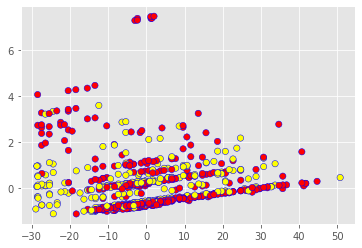

In [54]:
pca=PCA(n_components=2)
show_reduced = pca.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

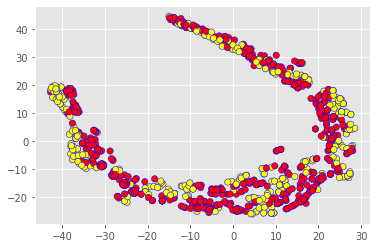

In [55]:
show_reduced = tsne.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

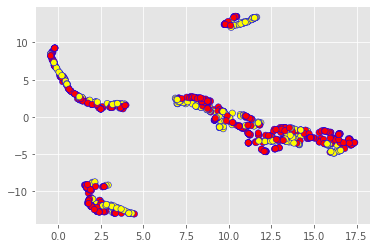

In [56]:
show_reduced = umap_emb.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], c=titanic_data.Survived,
           cmap=plt.cm.autumn, edgecolor='b', s=40)
plt.show()

/tmp/ipykernel_302689/1921297182.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150)


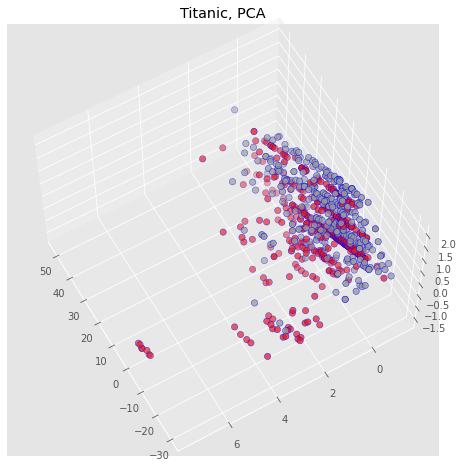

In [57]:
pca3 = PCA(n_components=3)
show_reduced = pca3.fit_transform(titanic_data)

fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic, PCA")

plt.show()

/tmp/ipykernel_302689/3608690455.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150)


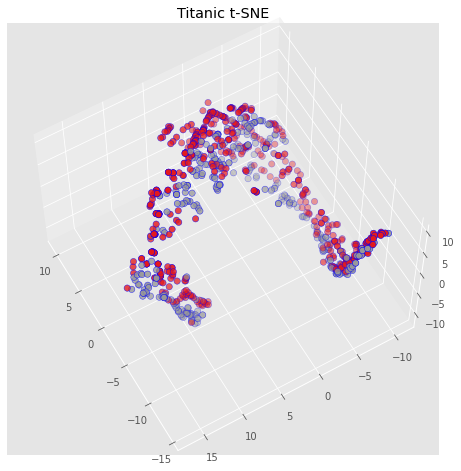

In [58]:
tsne3 = TSNE(n_components=3)
show_reduced = tsne3.fit_transform(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], c=titanic_data.Survived, 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Titanic t-SNE")

plt.show()

Кроме того, попробуем посмотреть как изменятся результаты классификации после применения преобразования пространства.

In [59]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate

In [60]:
scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], 
                                          titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.69221807, 0.02970791, 0.0259037 , 0.02631736, 0.02416205,
       0.02528501, 0.0264163 , 0.02449989, 0.02410388, 0.02502894,
       0.02575707, 0.02618456, 0.02442336, 0.0239284 , 0.03022242,
       0.02862525, 0.02436066, 0.02428007, 0.02475452, 0.02442622,
       0.02532935, 0.02441382, 0.02532744, 0.02548814, 0.02582097,
       0.02600431, 0.02543616, 0.02559257, 0.03424501, 0.02459931]), 'score_time': array([0.00936294, 0.00680399, 0.00702405, 0.00706363, 0.00751281,
       0.00734496, 0.00683355, 0.00710297, 0.00741291, 0.00698042,
       0.00733471, 0.00721312, 0.00683665, 0.00633907, 0.00798988,
       0.0069313 , 0.00697827, 0.00652051, 0.0065701 , 0.00662923,
       0.00733781, 0.00696254, 0.00723004, 0.00687122, 0.00670266,
       0.00690818, 0.00692677, 0.00658727, 0.00688243, 0.00840211]), 'test_score': array([0.73333333, 0.66666667, 0.8       , 0.7       , 0.73333333,
       0.86666667, 0.73333333, 0.8       , 0.76666667, 0.7       ,
       0.86666667

In [61]:
reduced_titanic = pca3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.10361958, 0.02748132, 0.0284493 , 0.02635098, 0.02688479,
       0.02715373, 0.02577519, 0.02837443, 0.02765346, 0.02640724,
       0.02450752, 0.02679682, 0.02781749, 0.0261066 , 0.02633572,
       0.02406096, 0.0258863 , 0.02611661, 0.02599239, 0.02602601,
       0.02826548, 0.02412224, 0.02487707, 0.02384281, 0.0241344 ,
       0.02781415, 0.02644563, 0.0261786 , 0.0275929 , 0.02984738]), 'score_time': array([0.00636959, 0.00530005, 0.00585794, 0.00627089, 0.00610971,
       0.00635552, 0.00630045, 0.00617433, 0.00586319, 0.00596118,
       0.0060339 , 0.00671768, 0.00696158, 0.0060041 , 0.00669789,
       0.00568867, 0.00608206, 0.0060184 , 0.00593925, 0.006037  ,
       0.00582147, 0.0054543 , 0.00563741, 0.00543046, 0.00643015,
       0.00566244, 0.00619054, 0.00630283, 0.00603485, 0.00810456]), 'test_score': array([0.63333333, 0.7       , 0.76666667, 0.63333333, 0.66666667,
       0.76666667, 0.6       , 0.8       , 0.66666667, 0.6       ,
       0.76666667

In [62]:
reduced_titanic = tsne3.fit_transform(titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])

scores = cross_validate(RandomForestClassifier(n_jobs=4, n_estimators=40, criterion="entropy"), 
                                          reduced_titanic, titanic_data['Survived'], 
                                          cv = 30)
print(scores)

{'fit_time': array([0.05481863, 0.02959609, 0.03463769, 0.02887297, 0.02643633,
       0.02826452, 0.02953339, 0.03000808, 0.02952337, 0.02952933,
       0.03070831, 0.03185153, 0.0310061 , 0.02883506, 0.02978182,
       0.0302844 , 0.02957225, 0.03159404, 0.03449965, 0.03290248,
       0.02944779, 0.03107882, 0.03113794, 0.03072739, 0.03141451,
       0.03124166, 0.03350306, 0.05071568, 0.03073335, 0.02713013]), 'score_time': array([0.00557137, 0.00635123, 0.00690937, 0.00649714, 0.00604606,
       0.00650716, 0.00617456, 0.00577617, 0.00621533, 0.00530624,
       0.00798512, 0.00626707, 0.00582671, 0.00589085, 0.00645232,
       0.00643849, 0.00592542, 0.00726414, 0.00671124, 0.00755119,
       0.00732207, 0.00611091, 0.00644469, 0.00714493, 0.00660586,
       0.00648475, 0.00611854, 0.00663972, 0.00591373, 0.006459  ]), 'test_score': array([0.66666667, 0.66666667, 0.73333333, 0.76666667, 0.46666667,
       0.7       , 0.53333333, 0.76666667, 0.6       , 0.66666667,
       0.76666667

In [63]:
from sklearn.datasets import load_digits

In [64]:
digits = load_digits()

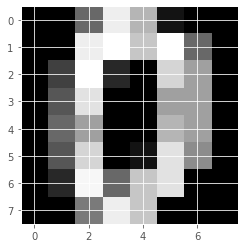

In [65]:
img = digits.images
plt.imshow(img[0], cmap=plt.cm.Greys_r);

In [66]:
img[0].shape

(8, 8)

In [67]:
X = img.reshape(-1, 64)

In [68]:
X.shape

(1797, 64)

In [69]:
y = digits.target

In [70]:
tsne2d = PCA(n_components=2)
show_reduced = tsne2d.fit_transform(X)


In [71]:
len(show_reduced)

1797

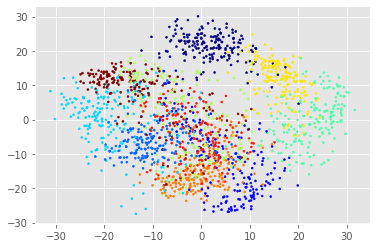

In [72]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

In [73]:
tsne2d2=umap.UMAP(n_components=2)
show_reduced = tsne2d2.fit_transform(X)


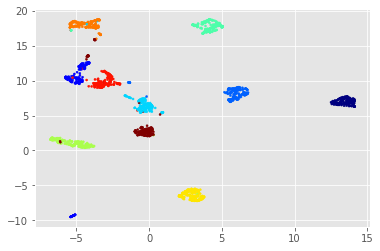

In [74]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in show_reduced], [x[1] for x in show_reduced], c=y,
           cmap=plt.cm.jet, s=4)
plt.show()

Рассмотренные методы позволяют проводить следующие действия:
- визуализировать многомерные данные в ходе предварительного анализа, визуализация позволяет прийти к преварительным выводам о возмоности или невозможности применения разных методов анализа;
- снизить размерность анализируемых данных и получить выигрыш в скорости обработки;
- точность анализа после преобразования пространства может как снизиться, так и увеличиться в зависимости от природы данных;
- методы t-SNE и UMAP позволяют работать с предварительно рассчитанными матрицами расстояниями между точками, за счет этого можно преобразовать неметрическое пространство в метрическое.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
with open("data/lenta2018.txt", encoding="utf-8") as news_file: # Файл с новостями.
    text_news = [n.split("-----\n")[1] for n in news_file.read().split("=====\n")[1:]]
    

In [77]:
cvct = TfidfVectorizer(text_news, 
                       token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+", 
                       ngram_range=(1, 2))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [78]:
tfidf_res = cvct.fit_transform(text_news)

In [79]:
umap_text = umap.UMAP(n_components=2)
text_reduced = umap_text.fit_transform(tfidf_res)

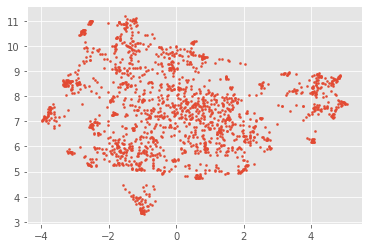

In [80]:
fig, ax = plt.subplots()
ax.scatter(text_reduced[:, 0], text_reduced[:, 1], s=4)
plt.show()

In [81]:
center = np.array([0.5, 5.])
texts_group = [i for i, pt in enumerate(text_reduced) if np.linalg.norm(center-pt)<0.3]

In [82]:
[text_news[i][:100] for i in texts_group]

['В феврале компания Nike представит новую версию своих классических кроссовок Air Force 1 полностью ч',
 'Парфюмерный бренд Mugler запустил новую линию Aura. Об этом сообщается в пресс-релизе, присланном в ',
 'Обувь марки Crocs на высокой платформе из коллекции Balenciaga x Crocs полностью распродана на стади',
 'Французский дом Hermès представил новую лимитированную версию декора мужского аромата Terre d’Hermès',
 'Демократичные бренды-производители одежды H&M и TopShop ввели дополнительные половинные размеры веще',
 'Японский бренд G-Shock, принадлежащий компании Casio, выпустил модель часов GWG-1000 Mudmaster для э',
 'В трех городах России пройдет ретроспектива фильмов итальянского режиссера Микеланджело Антониони. О',
 'Итальянская компания Bottega Veneta, производитель аксессуаров, одежды и обуви класса люкс, представ',
 'Модный дом Boss представил первую капсульную коллекцию Black Edition, созданную совместно с парфюмер',
 'Итальянская парфюмерная компания Acqua di Parma выпус

In [83]:
umap_text3 = umap.UMAP(n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

/tmp/ipykernel_302689/3230944716.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig=fig, elev=60, azim=150)


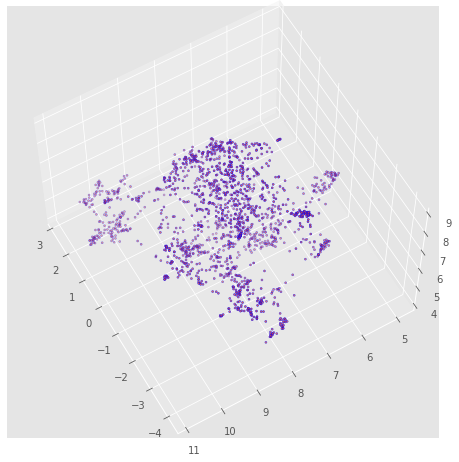

In [91]:
fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig=fig, elev=60, azim=150)
ax.scatter(text_reduced3[:, 0], text_reduced3[:, 1], text_reduced3[:, 2], edgecolor='b', s=4);


In [97]:
center3 = np.array([-3., 8., 6.])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<0.5]
[text_news[i][:100] for i in texts_group3]

['Воздушно-космические силы (ВКС) России в этом году получат более 100 новых и модернизированных самол',
 'Министерство обороны России закупит 114 боевых вертолетов Ка-52 «Аллигатор». Об этом рассказал журна',
 'Военно-морской флот России применил  свыше 100 ракет, помогая бороться с террористами в Сирии. Об эт',
 'Британское издание Daily Express опубликовало статьи о новом секретном оружии России и возможной «то',
 'Российские военные провели успешные испытания модернизированной ракеты системы противоракетной оборо',
 'Причиной ухода Франца Клинцевича с поста первого заместителя председателя комитета по обороне и безо',
 'В российской самолетостроительной корпорации «МиГ» предупредили украинских коллег о негативных после',
 'Британский многоцелевой разведывательный корабль HMS Enterprise опасно сблизился с российским военны',
 'Минобороны опровергло данные об опасном сближении российского и британского кораблей в проливе Босфо']

In [98]:
umap_text3 = umap.UMAP(n_neighbors=5, n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)

/tmp/ipykernel_302689/350347471.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=60, azim=150)


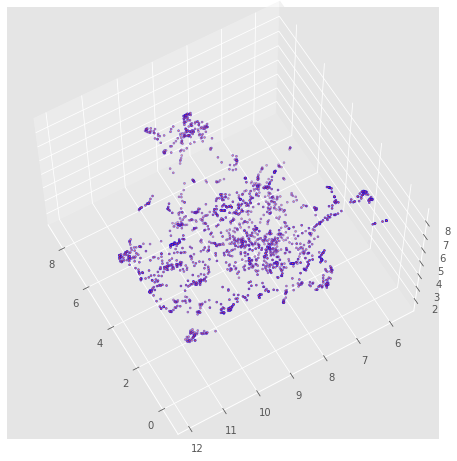

In [99]:
fig = plt.figure(5, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(text_reduced3[:, 0], text_reduced3[:, 1], text_reduced3[:, 2], edgecolor='b', s=4);


In [104]:
center3 = np.array([6., 9., 6])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<1]
[text_news[i][:100] for i in texts_group3]

['Нападающий «Зенита» Лука Джорджевич, выступающий на правах аренды за тульский «Арсенал», рассказал о',
 'Русскоязычные пользователи Twitter запустили флешмоб, в котором шутят об особенностях языка разных п',
 'Вице-премьер Виталий Мутко высказался о перспективах нападающего Артема Дзюбы вернуться в сборную Ро',
 'Литовский клуб «Паневежис» объявил о подписании контракта с нападающим Баркли Мигелем Панзо, поверив',
 'Полузащитник санкт-петербургского «Зенита» и сборной Эквадора Кристиан Нобоа рассказал о первом прие',
 'Вице-чемпион мира в составе сборной Франции Вильям Галлас вспомнил о совместных выступлениях с росси',
 'В Twitter устроили флешмоб, высмеивающий разное отношение мужчин и женщин к флирту, свиданиям, сексу',
 'Дети и родственники топ-менеджеров, работающие на высоких позициях в компаниях, создают эффект «отри',
 'richrussiankids / Instagram19-летний полузащитник российского клуба «Тосно» Станислав Манаев опублик']